## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis (EDA)

In [3]:
# Load data
df = pd.read_csv('cars.csv', delimiter=';')

In [4]:
# Check if data exist
if df.empty:
    print("No data.")
else:
    print("Data exist.")

Data exist.


In [5]:
# Line and column numbers
df.shape

(406, 9)

In [6]:
# Dimension (dataset)
print("Dimension:", df.ndim)

Dimension: 2


In [7]:
# Dataset: head
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


In [8]:
# Dataset: tail
df.tail()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
401,Ford Mustang GL,27.0,4,140.0,86.0,2790.0,15.6,82,US
402,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
403,Dodge Rampage,32.0,4,135.0,84.0,2295.0,11.6,82,US
404,Ford Ranger,28.0,4,120.0,79.0,2625.0,18.6,82,US
405,Chevy S-10,31.0,4,119.0,82.0,2720.0,19.4,82,US


In [9]:
# Dataset columns or Variables
df.columns

Index(['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model', 'Origin'],
      dtype='object')

In [10]:
numeric_cols = df.select_dtypes(exclude=['object']).columns.to_list()
categorie = df.select_dtypes(include=['object']).columns.to_list()

In [11]:
numeric_cols

['MPG',
 'Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Model']

In [12]:
categorie

['Car', 'Origin']

In [13]:
# Variable types
df.dtypes.to_frame()

,0
Car,object
MPG,float64
Cylinders,int64
Displacement,float64
Horsepower,float64
Weight,float64
Acceleration,float64
Model,int64
Origin,object


In [14]:
# Variable details 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car           406 non-null    object 
 1   MPG           406 non-null    float64
 2   Cylinders     406 non-null    int64  
 3   Displacement  406 non-null    float64
 4   Horsepower    406 non-null    float64
 5   Weight        406 non-null    float64
 6   Acceleration  406 non-null    float64
 7   Model         406 non-null    int64  
 8   Origin        406 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 28.7+ KB


In [15]:
df.count().to_frame()

,0
Car,406
MPG,406
Cylinders,406
Displacement,406
Horsepower,406
Weight,406
Acceleration,406
Model,406
Origin,406


In [16]:
set(df["Origin"])

{'Europe', 'Japan', 'US'}

In [ ]:
import missingno as ms
ms.matrix(df);

In [ ]:
# First method
df["Origin"].value_counts()

In [ ]:
# Second method
print('US', df[["Origin"]].query("Origin == 'US'").count())

In [18]:
# Second method
print('Europe', df[["Origin"]].query("Origin == 'Europe'").count())

Europe Origin    73
dtype: int64


In [19]:
# Second method
print('Japan', df[["Origin"]].query("Origin == 'Japan'").count())

Japan Origin    79
dtype: int64


In [20]:
# Statistics
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,23.051232,5.475369,194.779557,103.529557,2979.413793,15.519704,75.921182
std,8.401777,1.712160,104.922458,40.520659,847.004328,2.803359,3.748737
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2226.500000,13.700000,73.000000
50%,22.350000,4.000000,151.000000,93.500000,2822.500000,15.500000,76.000000
75%,29.000000,8.000000,302.000000,129.000000,3618.250000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [21]:
# Not na values
df.notna().sum().to_frame()

,0
Car,406
MPG,406
Cylinders,406
Displacement,406
Horsepower,406
Weight,406
Acceleration,406
Model,406
Origin,406


In [22]:
# Null values
df.isnull().sum().to_frame()

,0
Car,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,0
Weight,0
Acceleration,0
Model,0
Origin,0


In [23]:
# na values (total)
df.isna().sum().sum()

0

In [24]:
# Data duplicated
for i in df.columns:
    print("{}: {}".format(i, df[i].duplicated().sum()))

Car: 98
MPG: 276
Cylinders: 401
Displacement: 323
Horsepower: 312
Weight: 50
Acceleration: 310
Model: 393
Origin: 403


In [25]:
# Unique Data
df.nunique().to_frame()

,0
Car,308
MPG,130
Cylinders,5
Displacement,83
Horsepower,94
Weight,356
Acceleration,96
Model,13
Origin,3


## Statistical Significance Tests and Visualization

##### In statistics, statistical significance means that the result that was produced has a reason behind it, it was not produced randomly, or by chance.

In [26]:
from scipy.stats import kstest, ttest_ind

In [27]:
df_stat = df[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model']]
df_stat.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70


In [28]:
for k in df_stat.columns:
    print("{}: {}".format(k, kstest(df_stat[k], 'norm')))

MPG: KstestResult(statistic=0.9802955665024631, pvalue=0.0, statistic_location=9.0, statistic_sign=-1)
Cylinders: KstestResult(statistic=0.9986501019683699, pvalue=0.0, statistic_location=3, statistic_sign=-1)
Displacement: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=68.0, statistic_sign=-1)
Horsepower: KstestResult(statistic=0.9852216748768473, pvalue=0.0, statistic_location=46.0, statistic_sign=-1)
Weight: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1613.0, statistic_sign=-1)
Acceleration: KstestResult(statistic=0.9999999999999993, pvalue=0.0, statistic_location=8.0, statistic_sign=-1)
Model: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=70, statistic_sign=-1)


<Axes: xlabel='MPG', ylabel='Count'>

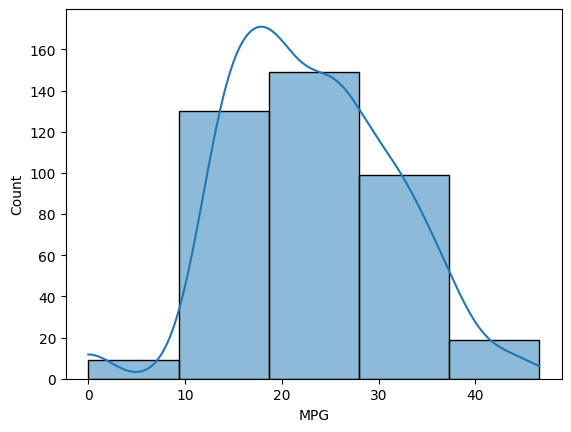

In [29]:
sns.histplot(df['MPG'], bins=5, kde=True)

<Axes: xlabel='Cylinders', ylabel='Count'>

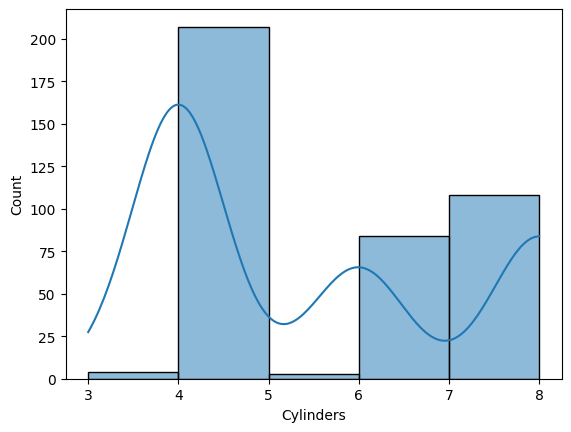

In [30]:
sns.histplot(df["Cylinders"], bins=5, kde=True)

<Axes: xlabel='Displacement', ylabel='Count'>

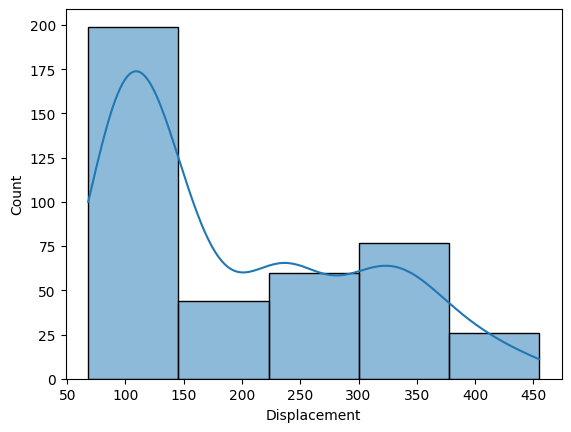

In [31]:
sns.histplot(df["Displacement"], bins=5, kde=True)

<Axes: xlabel='Horsepower', ylabel='Count'>

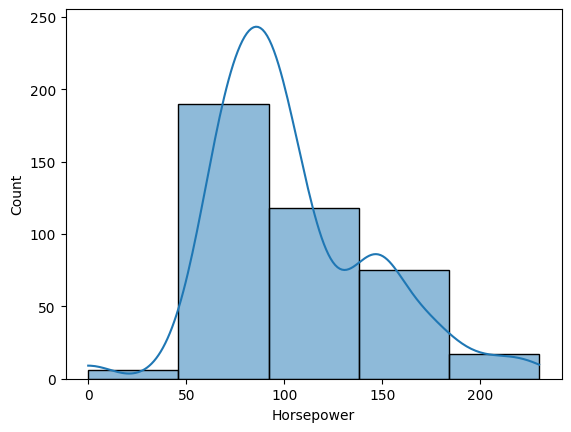

In [32]:
sns.histplot(df["Horsepower"], kde=True, bins=5)

<Axes: xlabel='Weight'>

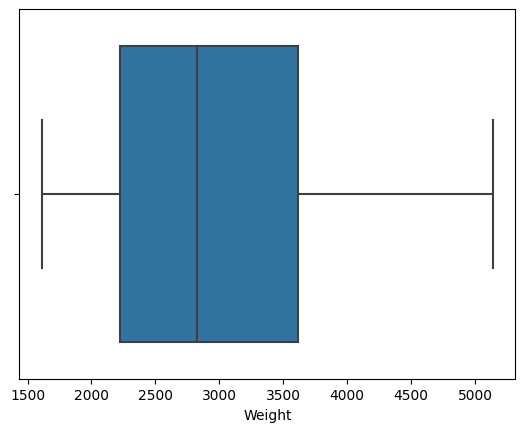

In [33]:
sns.boxplot(x=df["Weight"], data=df)

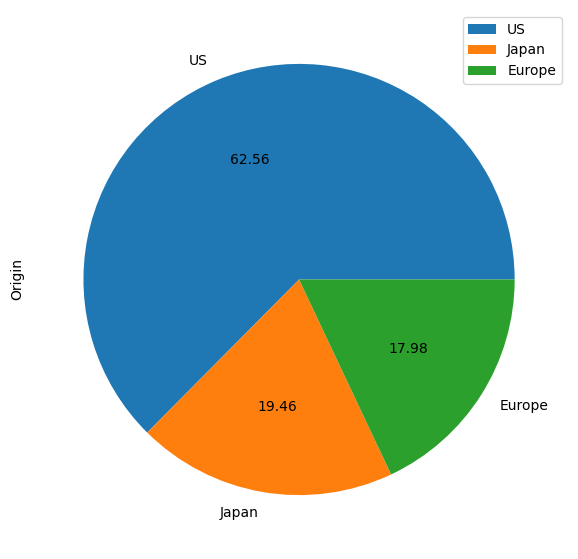

In [34]:
df['Origin'].value_counts().plot.pie(figsize=(7, 7), autopct='%.2f').legend()
plt.show()

statistic, pvalue: Ttest_indResult(statistic=68.33644443885757, pvalue=0.0)


C:\Users\Rostaing\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


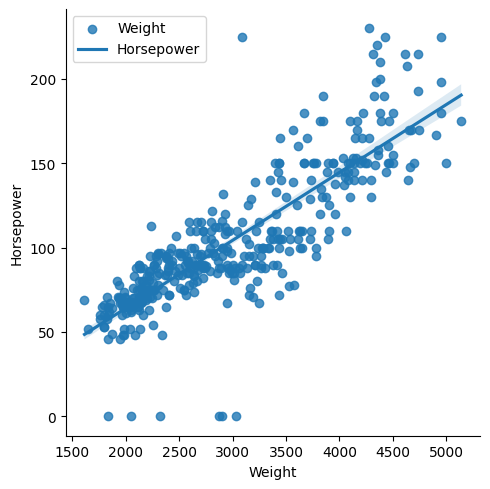

In [35]:
print('statistic, pvalue:', ttest_ind(df["Weight"], df["Horsepower"]))
sns.lmplot(x="Weight", y="Horsepower", data=df)
plt.legend(df[["Weight","Horsepower"]])
print("")
plt.show()

statistic, pvalue: Ttest_indResult(statistic=-39.185457512056345, pvalue=3.3911667539784412e-189)


C:\Users\Rostaing\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


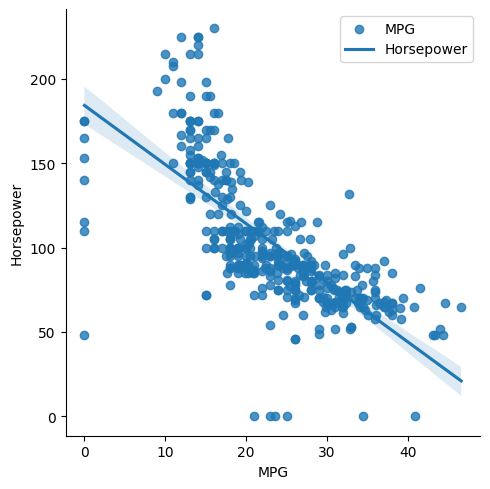

In [36]:
print('statistic, pvalue:', ttest_ind(df["MPG"], df["Horsepower"]))
sns.lmplot(x="MPG", y="Horsepower", data=df)
plt.legend(df[["MPG", "Horsepower"]])
print("")
plt.show()

statistic, pvalue: Ttest_indResult(statistic=-48.715292072943285, pvalue=6.149101694152205e-243)


C:\Users\Rostaing\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


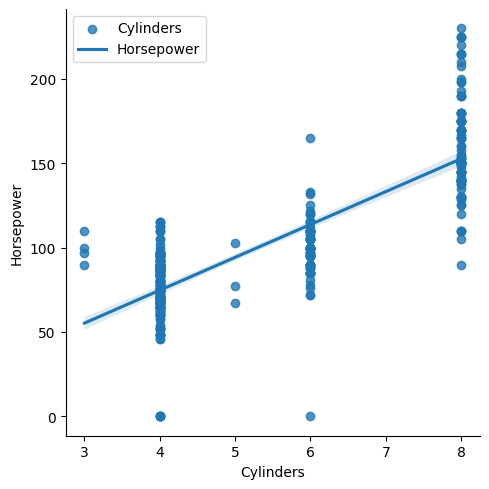

In [37]:
print('statistic, pvalue:', ttest_ind(df["Cylinders"], df["Horsepower"]))
sns.lmplot(x="Cylinders", y="Horsepower", data=df)
plt.legend(df[["Cylinders", "Horsepower"]])
print("")
plt.show()

statistic, pvalue: Ttest_indResult(statistic=16.34705548988017, pvalue=3.988433123064458e-52)


C:\Users\Rostaing\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


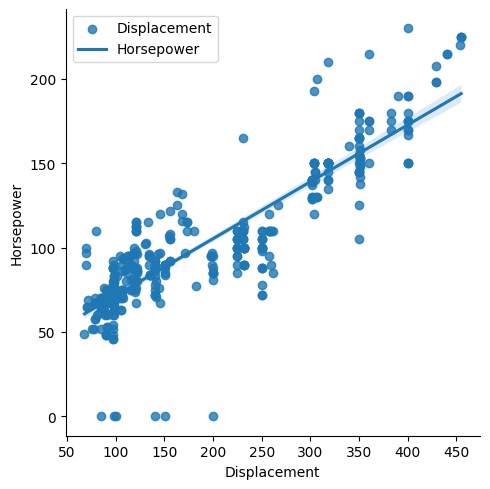

In [38]:
print('statistic, pvalue:', ttest_ind(df["Displacement"], df["Horsepower"]))
sns.lmplot(x="Displacement", y="Horsepower", data=df)
plt.legend(df[["Displacement", "Horsepower"]])
print("")
plt.show()

statistic, pvalue: Ttest_indResult(statistic=-43.65971981682766, pvalue=5.105394857744097e-215)


C:\Users\Rostaing\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


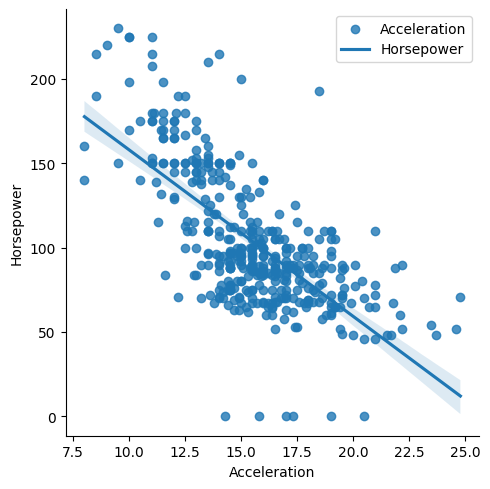

In [39]:
print('statistic, pvalue:', ttest_ind(df["Acceleration"], df["Horsepower"]))
sns.lmplot(x="Acceleration", y="Horsepower", data=df)
plt.legend(df[["Acceleration", "Horsepower"]])
print("")
plt.show()

statistic, pvalue: Ttest_indResult(statistic=-13.670258346480617, pvalue=1.975133426610494e-38)


C:\Users\Rostaing\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


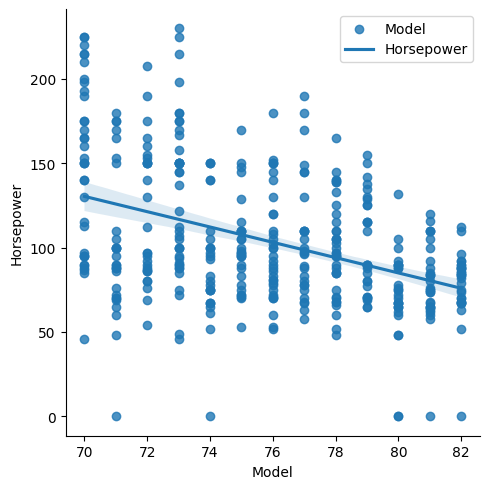

In [40]:
print('statistic, pvalue:', ttest_ind(df["Model"], df["Horsepower"]))
sns.lmplot(x="Model", y="Horsepower", data=df)
print("")
plt.legend(df[["Model", "Horsepower"]])
plt.show()

C:\Users\Rostaing\anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


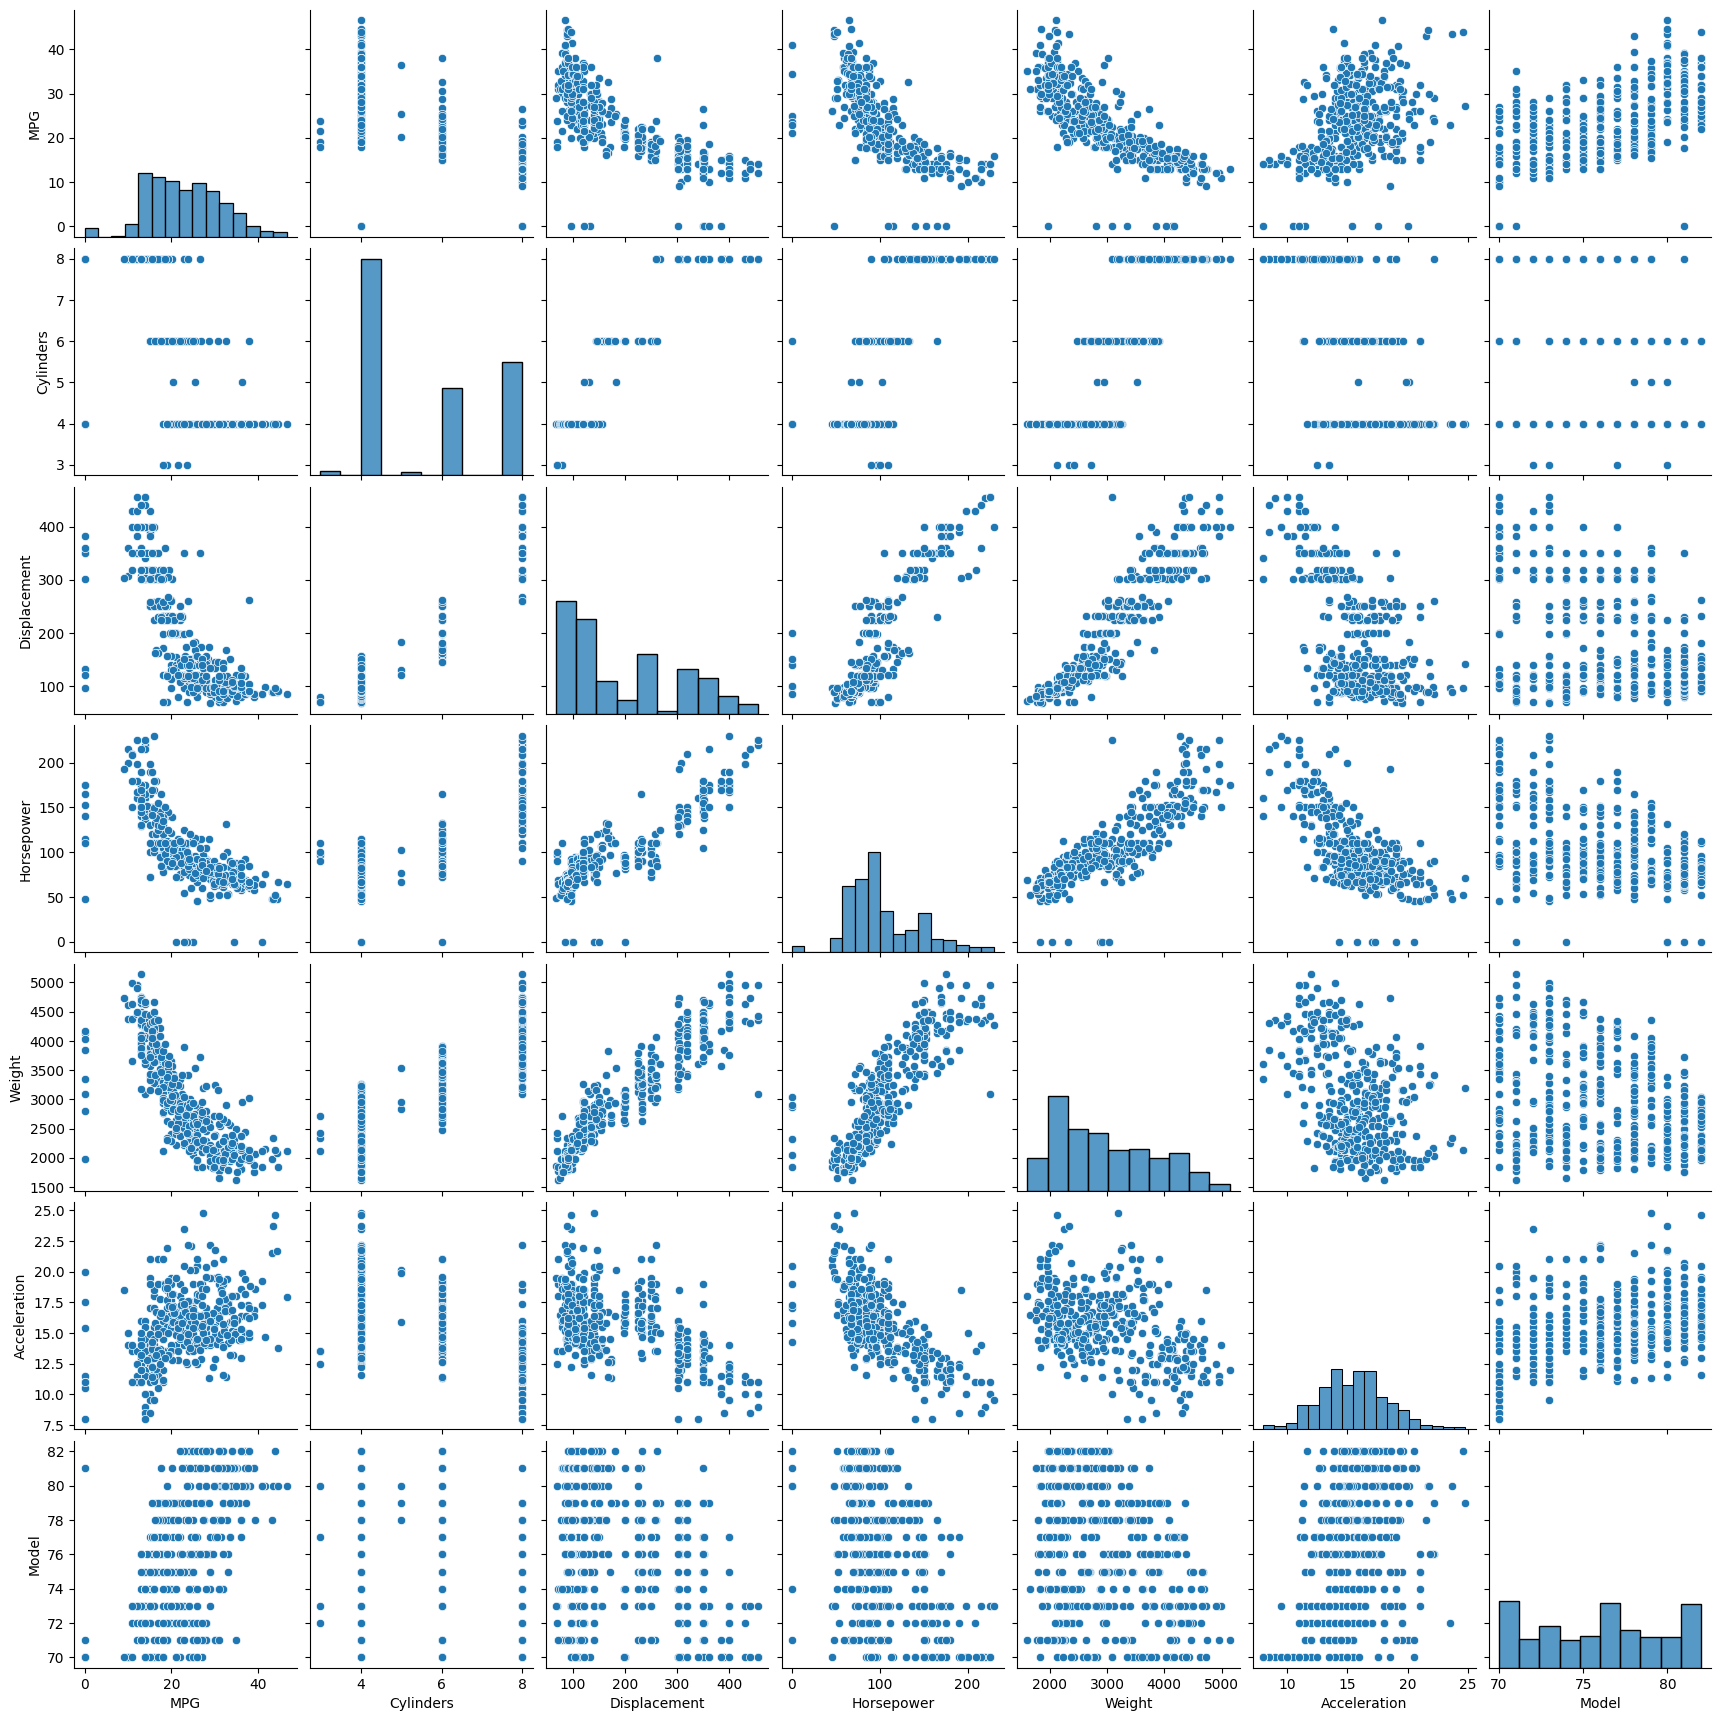

In [41]:
sns.pairplot(df)
plt.show()

C:\Users\Rostaing\AppData\Local\Temp\ipykernel_13580\3386966809.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=3)


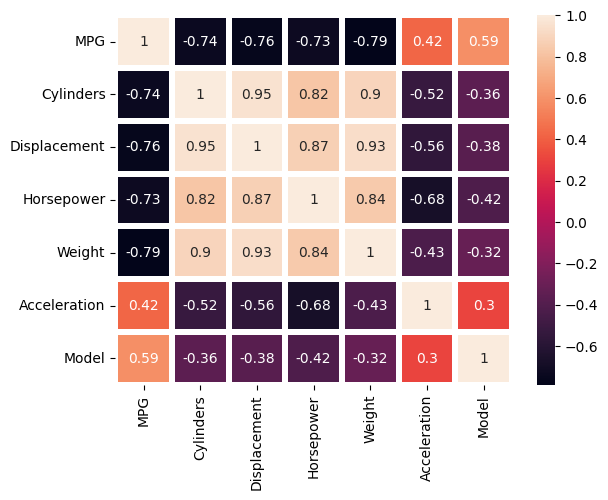

In [42]:
sns.heatmap(df.corr(), annot=True, linewidths=3)
plt.show()

# Data Pre-processing

In [43]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder

In [44]:
print(df.shape)
df.head(1)

(406, 9)


,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US


In [45]:
y = df[["Horsepower"]].values
print("Shape: {}\nDimension: {}\nType: {}".format(y.shape, y.ndim, type(y)))

Shape: (406, 1)
Dimension: 2
Type: <class 'numpy.ndarray'>


In [46]:
x = df[["MPG", "Cylinders",	"Displacement",	"Weight", "Acceleration", "Model", "Origin"]]
x.head(3)

,MPG,Cylinders,Displacement,Weight,Acceleration,Model,Origin
0,18.0,8,307.0,3504.0,12.0,70,US
1,15.0,8,350.0,3693.0,11.5,70,US
2,18.0,8,318.0,3436.0,11.0,70,US


In [47]:
encoder = LabelEncoder()
x.loc[:, "Origin"] = encoder.fit_transform(x.loc[:, "Origin"])
x.head()

C:\Users\Rostaing\AppData\Local\Temp\ipykernel_13580\209715985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:, "Origin"] = encoder.fit_transform(x.loc[:, "Origin"])
C:\Users\Rostaing\AppData\Local\Temp\ipykernel_13580\209715985.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:, "Origin"] = encoder.fit_transform(x.loc[:, "Origin"])


,MPG,Cylinders,Displacement,Weight,Acceleration,Model,Origin
0,18.0,8,307.0,3504.0,12.0,70,2
1,15.0,8,350.0,3693.0,11.5,70,2
2,18.0,8,318.0,3436.0,11.0,70,2
3,16.0,8,304.0,3433.0,12.0,70,2
4,17.0,8,302.0,3449.0,10.5,70,2


In [48]:
set(x["Origin"])

{0, 1, 2}

In [49]:
X = x.values
print("Shape: {}\nDimension: {}\nType: {}".format(X.shape, X.ndim, type(X)))

Shape: (406, 7)
Dimension: 2
Type: <class 'numpy.ndarray'>


# Modeling (Machine Learning Model)

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso , LassoLarsIC, ElasticNet
from sklearn.metrics import accuracy_score, precision_recall_curve, recall_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.random_projection import SparseRandomProjection

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print("X_train: {}\ny_train: {}".format(X_train.shape, y_train.shape))
print("X_test: {}\ny_test: {}".format(X_test.shape, y_test.shape))

In [ ]:
# Model 1
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
print("Test score: {}%".format(round(model_1.score(X_test, y_test)*100)))

In [ ]:
# Model 2
model_2 =  make_pipeline(VarianceThreshold(),PolynomialFeatures(), RobustScaler(), Ridge())
model_2.fit(X_train, y_train.ravel())
print("Test score: {}%".format(round(model_2.score(X_test, y_test)*100)))

In [ ]:
# Predictions
predictions = model_2.predict(X_test)

### Save the Model

In [13]:
from joblib import dump, load

In [65]:
dump(model_2, 'model_2.joblib')

['model_2.joblib']

In [66]:
s = load('model_2.joblib')
s.predict([[2.0, 80, 86.2, 850.56, 100.5, 1, 2]])

array([700.55196931])

In [67]:
from sklearn.metrics import RocCurveDisplay

In [ ]:
# Scatter plot of residuals and predicted values
# plt.figure(figsize=(10,7))
# plt.title("Residuals vs. predicted values plot",fontsize=25)
# plt.xlabel("Predicted Horsepower",fontsize=18)
# plt.ylabel("Residuals", fontsize=18)
# plt.scatter(x=predictions,y=y_test-predictions)

In [68]:
# Regression evaluation metrices
print("Mean absolute error (MAE):", mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 6.492921953403035
Mean square error (MSE): 69.95578137337955
Root mean square error (RMSE): 8.363957279504694


In [ ]:
## Prediction function with the model_2 : test score = 96

def pred(model_2, MPG, Cylinders, Displacement, Weight, Acceleration, Model, Origin):
    return model_2.predict([[ MPG, Cylinders, Displacement, Weight, Acceleration, Model, Origin]]).flatten()[0]
print("")
try:
    MPG = float(input("MPG: "))
    Cylinders = int(input("Cylinders: "))
    Displacement = float(input("Displacement: "))
    Weight = float(input("Weight: "))
    Acceleration = float(input("Acceleration: "))
    Model = int(input("Model: "))
    Origin = int(input("Origin: "))
    print("Horsepower = ", abs(round(pred(model_2, MPG, Cylinders, Displacement, Weight, Acceleration, Model, Origin),2)))
except:
    print("Error.")
finally:
    print("\nBye!")

## Learning Curve (model_2)

In [14]:
from sklearn.model_selection import learning_curve

[ 25  51  77 103 129 155 181 207 233 259]


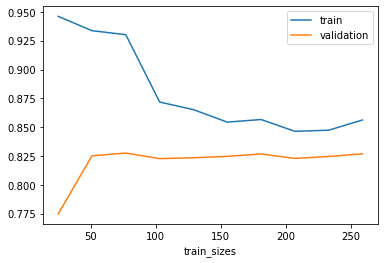

In [70]:
N, train_score, val_score = learning_curve(model_2, X_train, y_train, 
                            train_sizes=np.linspace(0.1, 1, 10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

### Data Scientist, Davila Rostaing.